In [1]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10)

## Scrapping Data from Website

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

# Get information of the second <table>
table = soup.find_all('table')[1]

# Extract <th> for the columns
world_titles = table.find_all('th')

# Clean up columns and set as dataframe 
table_titles = [title.text.strip() for title in world_titles]

df = pd.DataFrame(columns = table_titles)
df

# Extract <th> for column data
column_data = table.find_all('tr')

# Set data points to the column they belong
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]

    length = len(df)
    df.loc[length] = individual_row_data
    
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


## Data Processing

### Remove specific characters from columns 'Revenue (USD millions)', 'Revenue growth' and 'Employees'. Change data type

In [ ]:
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',', '').astype(float)
df['Revenue growth'] = df['Revenue growth'].str.replace('%', '').astype(float)
df['Employees'] = df['Employees'].str.replace('[^0-9]', '', regex=True).astype(int)

df

### Expand column 'Headquarters' to two columns ('City' and 'State'), separated by ','

In [5]:
df[['City', 'State']] = df['Headquarters'].str.split(pat=',', n=1, expand=True)

df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,City,State
0,1,Walmart,Retail,611289.0,6.7,2100000,"Bentonville, Arkansas",Bentonville,Arkansas
1,2,Amazon,Retail and cloud computing,513983.0,9.4,1540000,"Seattle, Washington",Seattle,Washington
2,3,ExxonMobil,Petroleum industry,413680.0,44.8,62000,"Spring, Texas",Spring,Texas
3,4,Apple,Electronics industry,394328.0,7.8,164000,"Cupertino, California",Cupertino,California
4,5,UnitedHealth Group,Healthcare,324162.0,12.7,400000,"Minnetonka, Minnesota",Minnetonka,Minnesota
...,...,...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,46298.0,10.6,71100,"Richfield, Minnesota",Richfield,Minnesota
96,97,Bristol-Myers Squibb,Pharmaceutical industry,46159.0,0.5,34300,"New York City, New York",New York City,New York
97,98,United Airlines,Airline,44955.0,82.5,92795,"Chicago, Illinois",Chicago,Illinois
98,99,Thermo Fisher Scientific,Laboratory instruments,44915.0,14.5,130000,"Waltham, Massachusetts",Waltham,Massachusetts


### Data Aggregation and Visualization

### Create a combination chart to illustrate total revenue generated by each industry and their corresponding average revenue growth.

In [7]:
industry_revenue = df.groupby('Industry')['Revenue (USD millions)'].sum()
industry_revenue

Industry
Aerospace and defense             132592.0
Agriculture cooperative            47194.0
Agriculture manufacturing          52577.0
Airline                           144508.0
Apparel                            46710.0
                                    ...   
Technology                        389147.0
Technology and cloud computing    541636.0
Telecom hardware manufacturing     51557.0
Telecommunications                312284.0
Transportation                    193850.0
Name: Revenue (USD millions), Length: 39, dtype: float64

In [8]:
# Group by Industry and calculate the mean of Revenue Growth
industry_growth = df.groupby('Industry')['Revenue growth'].mean()

industry_growth

Industry
Aerospace and defense              4.250000
Agriculture cooperative           24.300000
Agriculture manufacturing         19.400000
Airline                           71.866667
Apparel                            4.900000
                                    ...    
Technology                        11.620000
Technology and cloud computing    14.700000
Telecom hardware manufacturing     3.500000
Telecommunications                 3.733333
Transportation                     7.250000
Name: Revenue growth, Length: 39, dtype: float64

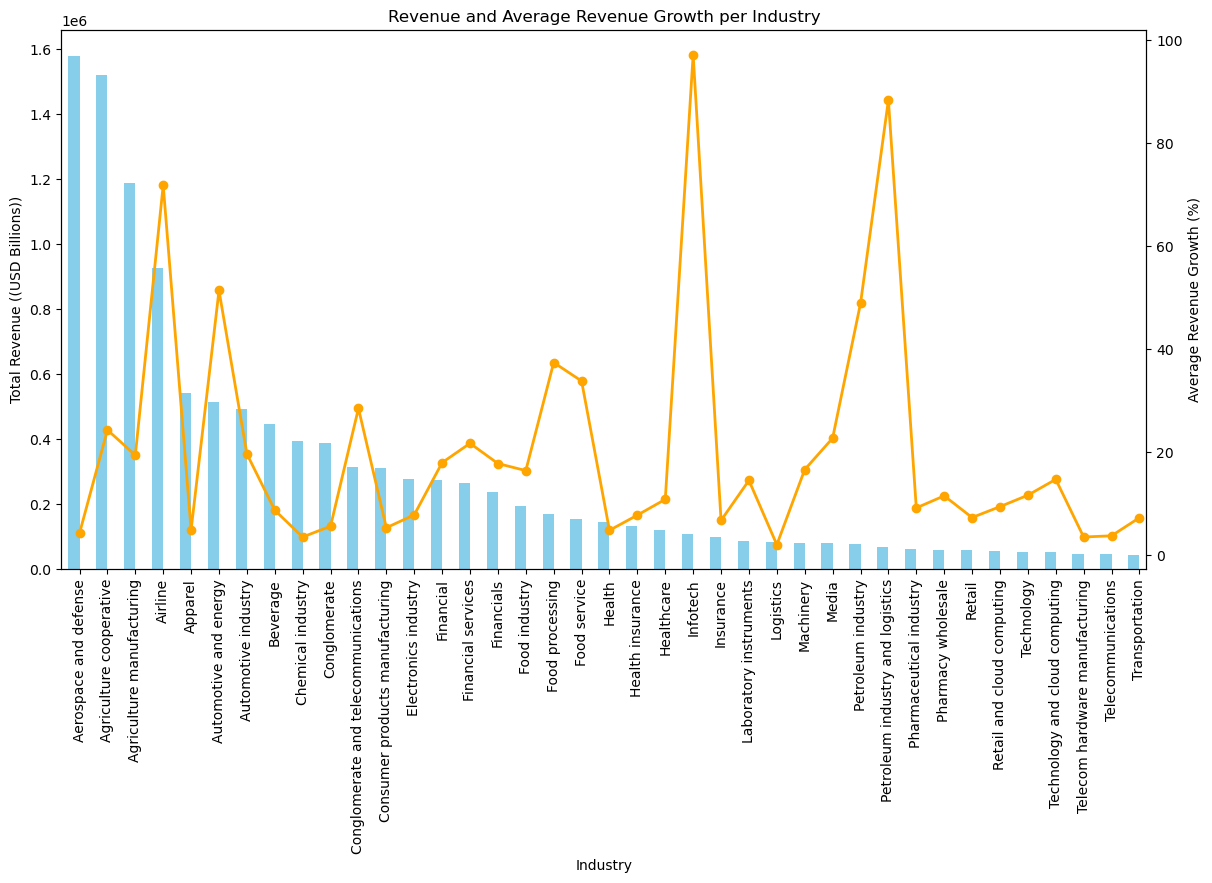

In [13]:
# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for total revenue per industry
industry_revenue.sort_values(ascending=False).plot(kind='bar', color='skyblue', ax=ax1, position=1, width=0.4)
ax1.set_ylabel('Total Revenue ((USD Billions))')
ax1.set_xlabel('Industry')

# Create a second y-axis for the line plot
ax2 = ax1.twinx()

# Line plot for average revenue growth per industry
industry_growth.plot(kind='line', marker='o', color='orange', ax=ax2, linewidth=2)
ax2.set_ylabel('Average Revenue Growth (%)')

plt.title('Revenue and Average Revenue Growth per Industry')
plt.show()

### Create a scatter plot to examine the correlation between revenue and number of employees, or to assess the impact of workforce size on total revenue.

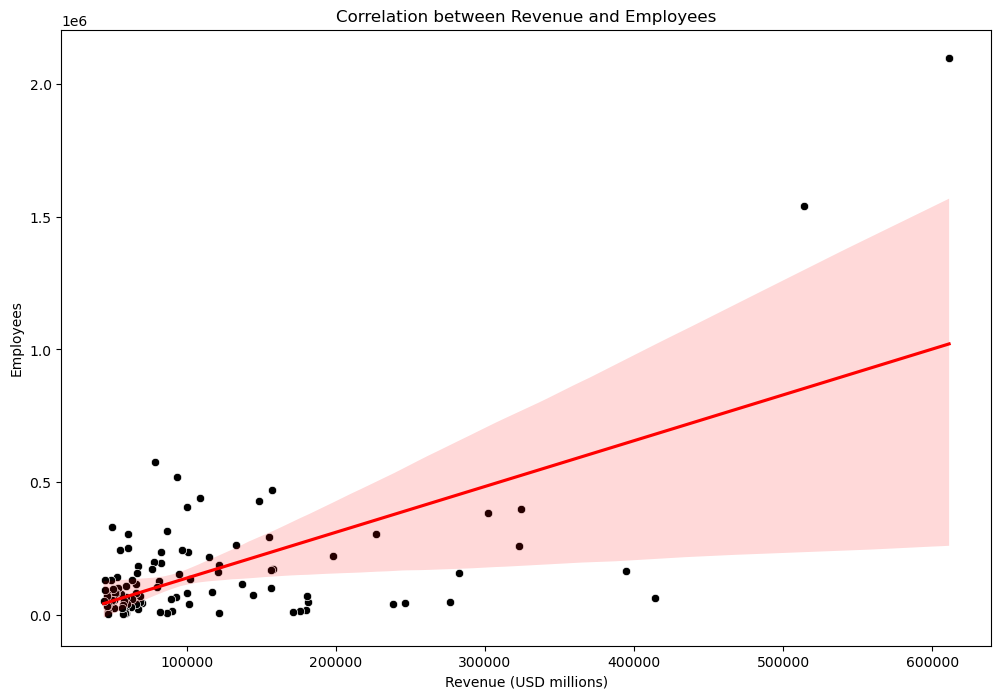

In [11]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Revenue (USD millions)', y='Employees', color='black')
sns.regplot(data=df, x='Revenue (USD millions)', y='Employees', scatter=False, color='red')
plt.title('Correlation between Revenue and Employees')
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Employees')
plt.grid(False)
plt.show()

### Create an area chart to visualize the distribution of the top 100 companies by revenue across different states based on the provided data.

In [14]:
state_counts = df.groupby('State')['State'].count().sort_values(ascending=False)

state_counts

State
 New York                 15
 Texas                    13
 California               10
 Illinois                  7
 Ohio                      6
                          ..
 Rhode Island              1
 Idaho                     1
 Cook County, Illinois     1
 Indiana                   1
 Maryland                  1
Name: State, Length: 28, dtype: int64

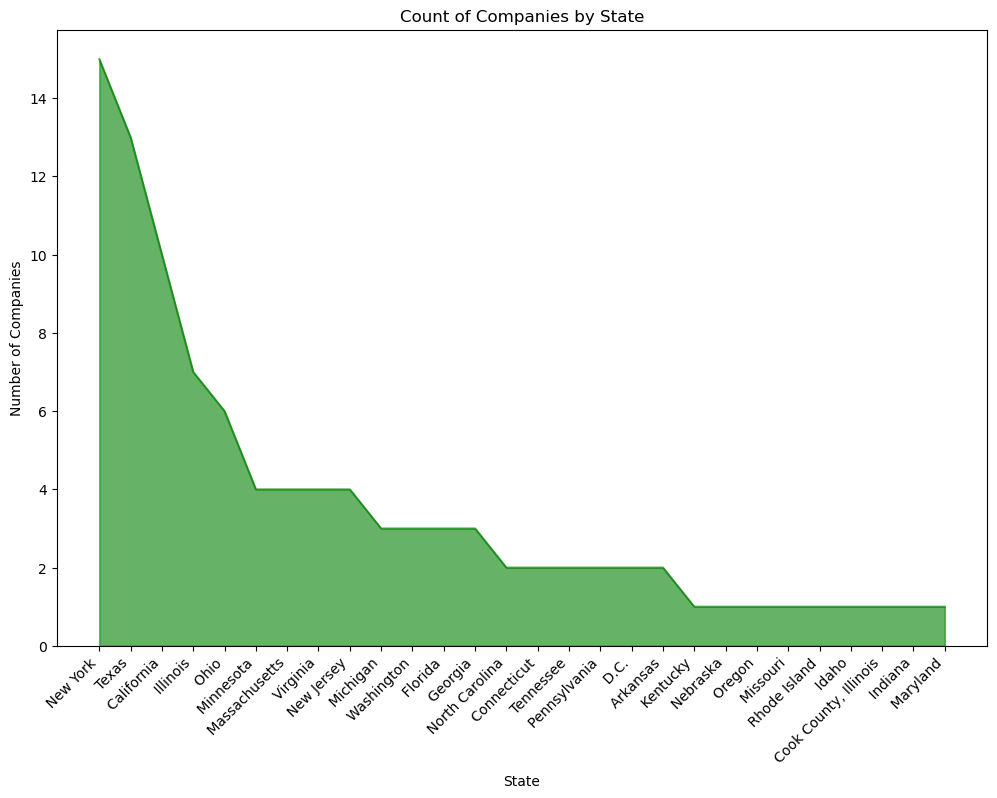

In [15]:
plt.figure(figsize=(12, 8))
state_counts.plot(kind='area', alpha=0.6, color='green')
plt.title('Count of Companies by State')
plt.xlabel('State')
plt.ylabel('Number of Companies')
plt.xticks(ticks=range(len(state_counts)), labels=state_counts.index, rotation=45, ha='right')
plt.grid(False)
plt.show()

### Create a bar chart to visualize the total revenue generated by top 100 companies in each state

In [17]:
revenue_state = df.groupby('State')['Revenue (USD millions)'].sum().sort_values(ascending=False)

revenue_state

State
 Texas                    1746953.0
 California               1427400.0
 New York                 1194903.0
 Washington                939207.0
 Ohio                      690882.0
                            ...    
 Kentucky                   92870.0
 Idaho                      77650.0
 Maryland                   65984.0
 Cook County, Illinois      51412.0
 Oregon                     46710.0
Name: Revenue (USD millions), Length: 28, dtype: float64

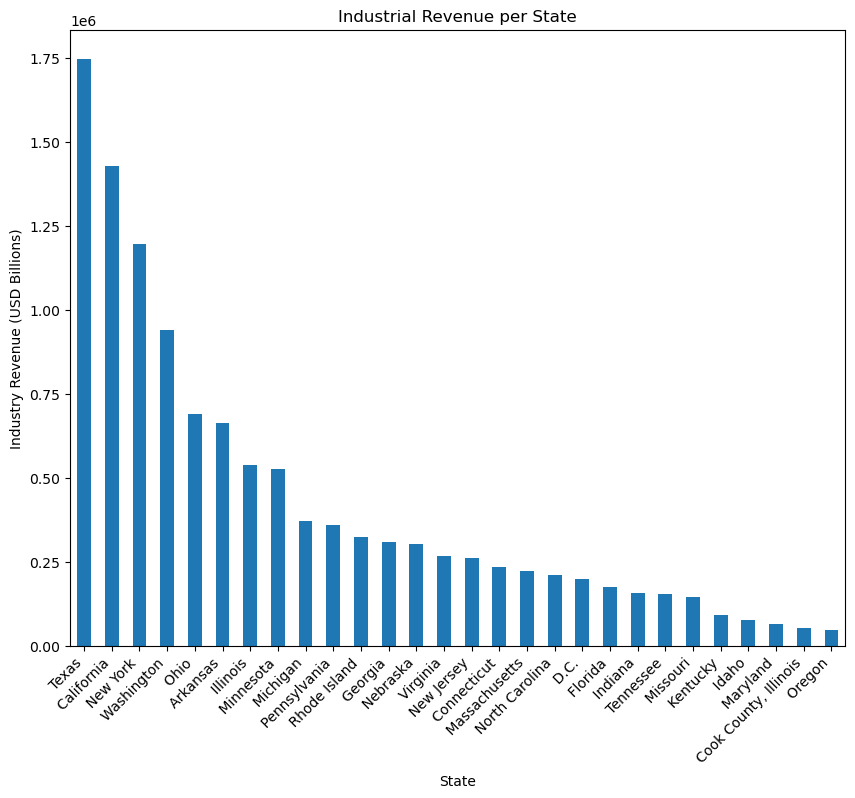

In [18]:
# Plot the bar chart
plt.figure(figsize=(10, 8))
revenue_state.plot(kind='bar')
plt.title('Industrial Revenue per State')
plt.xlabel('State')
plt.ylabel('Industry Revenue (USD Billions)')
plt.xticks(rotation=45, ha='right')
plt.show()